In [21]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict
# import imageio

In [22]:
heatmap_df = pd.read_csv('heatmap_peers.csv')

In [23]:
heatmap_df['SubmitTime'] = pd.to_datetime(heatmap_df['SubmitTime'])
heatmap_df[['WorkerId', 'SubmitTime']].sort_values('SubmitTime')

/usr/local/miniconda3/envs/cis530_conda/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,WorkerId,SubmitTime
1,A32TTE4XXN6MQZ,2019-04-21 10:53:00
26,APICU54PD3JZF,2019-04-21 18:15:20
21,A1HTSCH5NYPS4R,2019-04-22 10:34:40
23,A32YP4ANU466LT,2019-04-22 19:40:17
5,A1P9T1A0OLRNY3,2019-04-23 12:20:52
18,AAZY70DQJ5BFE,2019-04-23 12:31:23
2,AY0INTNXKC6ZO,2019-04-23 12:53:15
17,A2DIGKVLJWN955,2019-04-23 13:58:16
12,AVR45JLAQN5ZC,2019-04-23 19:33:05
15,ALPWT2JWPLXA1,2019-04-23 20:12:44


In [24]:
heatmap_df['WorkTimeInSeconds'].describe()

count     29.000000
mean      36.206897
std       27.983898
min        7.000000
25%       12.000000
50%       28.000000
75%       49.000000
max      117.000000
Name: WorkTimeInSeconds, dtype: float64

In [25]:
worker_submittime = {}
for _, row in heatmap_df[['WorkerId', 'SubmitTime']].iterrows():
    worker_submittime[row['WorkerId']] = row['SubmitTime']
worker_submittime

{'A1YXUJF77LEX1J': Timestamp('2019-04-25 15:59:16'),
 'A32TTE4XXN6MQZ': Timestamp('2019-04-21 10:53:00'),
 'AY0INTNXKC6ZO': Timestamp('2019-04-23 12:53:15'),
 'A28RPWZS3IPTRM': Timestamp('2019-04-25 10:05:04'),
 'A1AMWY5239KF3Y': Timestamp('2019-04-25 17:00:37'),
 'A1P9T1A0OLRNY3': Timestamp('2019-04-23 12:20:52'),
 'A1P97PT7OUQHU4': Timestamp('2019-04-25 10:07:09'),
 'A3O8K08MXAW5C6': Timestamp('2019-04-25 08:28:05'),
 'A2VH5M7RLI6708': Timestamp('2019-04-25 04:49:41'),
 'A30VAVBAUXE301': Timestamp('2019-04-25 13:37:03'),
 'A9UIN25Y2HNGP': Timestamp('2019-04-24 18:19:49'),
 'AAHT5IXE5NHA0': Timestamp('2019-04-25 09:39:42'),
 'AVR45JLAQN5ZC': Timestamp('2019-04-23 19:33:05'),
 'AG1XA7PPOEY4Z': Timestamp('2019-04-25 13:04:43'),
 'A5HHF7CXK8YHU': Timestamp('2019-04-25 15:07:21'),
 'ALPWT2JWPLXA1': Timestamp('2019-04-23 20:12:44'),
 'A2Y5XC6F1BYXS3': Timestamp('2019-04-25 09:17:45'),
 'A2DIGKVLJWN955': Timestamp('2019-04-23 13:58:16'),
 'AAZY70DQJ5BFE': Timestamp('2019-04-23 12:31:23'),
 

In [26]:
points = []
points_per_worker = defaultdict(int)
for worker_id, response in zip(heatmap_df['WorkerId'], heatmap_df['Answer.response']):
    response = json.loads(response)
    for click in response:
        points.append((round(click['x']), round(click['y']), click['timestamp'], worker_id))
    points_per_worker[worker_id] += len(response)
        
points.sort(key=lambda x: x[2])

In [27]:
# len(heatmap_df['WorkerId'].value_counts())

In [28]:
sorted(points_per_worker.items(), key=lambda x: worker_submittime[x[0]])

[('A32TTE4XXN6MQZ', 56),
 ('APICU54PD3JZF', 150),
 ('A1HTSCH5NYPS4R', 75),
 ('A32YP4ANU466LT', 127),
 ('A1P9T1A0OLRNY3', 11),
 ('AAZY70DQJ5BFE', 14),
 ('AY0INTNXKC6ZO', 10),
 ('A2DIGKVLJWN955', 10),
 ('AVR45JLAQN5ZC', 176),
 ('ALPWT2JWPLXA1', 48),
 ('APX5J4BSY8X98', 11),
 ('AHJ6UEG2YC0Q3', 10),
 ('A2N74CHUQ5T60G', 20),
 ('A9UIN25Y2HNGP', 11),
 ('A23441R746K5OU', 13),
 ('A3MAF5W7IGJTQS', 11),
 ('A2VH5M7RLI6708', 10),
 ('A3O8K08MXAW5C6', 33),
 ('A21CNDWV70DK3G', 10),
 ('A2Y5XC6F1BYXS3', 11),
 ('AAHT5IXE5NHA0', 21),
 ('A28RPWZS3IPTRM', 21),
 ('A1P97PT7OUQHU4', 10),
 ('A3907LDKHAP28P', 10),
 ('AG1XA7PPOEY4Z', 10),
 ('A30VAVBAUXE301', 40),
 ('A5HHF7CXK8YHU', 69),
 ('A1YXUJF77LEX1J', 25),
 ('A1AMWY5239KF3Y', 10)]

In [29]:
pd.Series(list(points_per_worker.values())).describe()

count     29.000000
mean      35.620690
std       44.360869
min       10.000000
25%       10.000000
50%       13.000000
75%       40.000000
max      176.000000
dtype: float64

In [30]:
heatmap_df['WorkerId'].value_counts()

A2N74CHUQ5T60G    1
A1AMWY5239KF3Y    1
A1HTSCH5NYPS4R    1
APICU54PD3JZF     1
A3907LDKHAP28P    1
AAZY70DQJ5BFE     1
A2Y5XC6F1BYXS3    1
A2VH5M7RLI6708    1
A5HHF7CXK8YHU     1
APX5J4BSY8X98     1
A23441R746K5OU    1
A3O8K08MXAW5C6    1
AAHT5IXE5NHA0     1
A30VAVBAUXE301    1
AG1XA7PPOEY4Z     1
A1P97PT7OUQHU4    1
ALPWT2JWPLXA1     1
A1P9T1A0OLRNY3    1
A21CNDWV70DK3G    1
A32TTE4XXN6MQZ    1
A1YXUJF77LEX1J    1
AHJ6UEG2YC0Q3     1
A3MAF5W7IGJTQS    1
AVR45JLAQN5ZC     1
A28RPWZS3IPTRM    1
A9UIN25Y2HNGP     1
A2DIGKVLJWN955    1
A32YP4ANU466LT    1
AY0INTNXKC6ZO     1
Name: WorkerId, dtype: int64

In [31]:
point

NameError: name 'point' is not defined

In [32]:
xs, ys, _, _ = zip(*points)
print(pd.Series(list(xs)).describe())
print(pd.Series(list(ys)).describe())

count    1033.000000
mean      288.824782
std       103.675792
min       104.000000
25%       204.000000
50%       273.000000
75%       373.000000
max       582.000000
dtype: float64
count    1033.000000
mean      225.798645
std        62.120180
min        87.000000
25%       189.000000
50%       219.000000
75%       264.000000
max       387.000000
dtype: float64


In [33]:
img_data = np.ones((600, 477))
for x, y in points:
    img_data[x, y] = 0

ValueError: too many values to unpack (expected 2)

In [34]:
# xs, ys = zip(*points)
# print(min(xs), max(xs), min(ys), max(ys))

In [35]:
import seaborn as sns

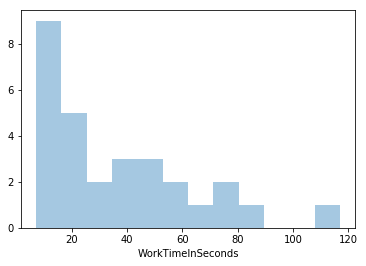

In [52]:
sns.distplot(heatmap_df['WorkTimeInSeconds'], bins=12, hist=True, kde=False)

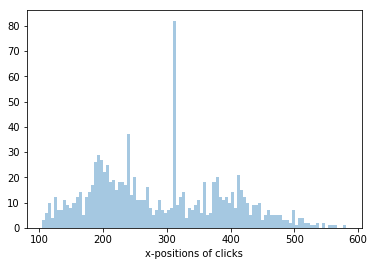

In [48]:
sns.distplot(xs, bins=100, hist=True, kde=False, axlabel='x-positions of clicks')

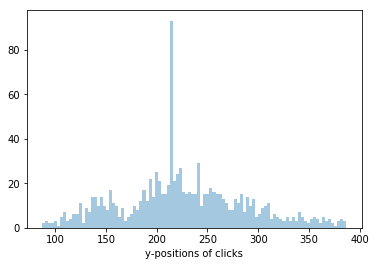

In [50]:
sns.distplot(ys, bins=100, hist=True, kde=False, axlabel='y-positions of clicks')

In [9]:
heatmap_df['WorkTimeInSeconds']

0      60
1      62
2      10
3       9
4      28
5      49
6      47
7      22
8      30
9      38
10     12
11     36
12     89
13     18
14     75
15     22
16      8
17     10
18     60
19     20
20     12
21     46
22     15
23     41
24      7
25     75
26    117
27      9
28     23
Name: WorkTimeInSeconds, dtype: int64